# Exploratory Data Analysis on Diamonds
## Frank Coleman III
### Dataset retrieved from: *https://www.kaggle.com/shivam2503/diamonds*


TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)
  - This dataset came from Kaggle.com
  - It contains over 50,000 observations of diamond data
  - 
  - 


## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

### Importing Libaries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv("diamonds.csv")
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [7]:
# how many variables are numerical?
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


8

In [8]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages


Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64

<AxesSubplot:>

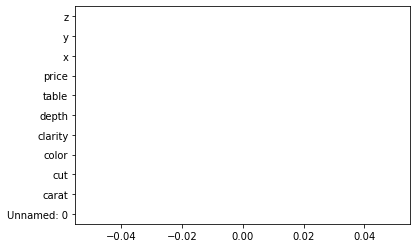

In [9]:
missing_percentages.plot(kind='barh')

In [10]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
#The column "unnamed:0" is an index column that provides no beneficial information. It is unnecessary and needs to be dropped.

df = df.drop(["Unnamed: 0"], axis=1)

In [12]:
#Making sure unnamed:0 is dropped
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [13]:
#Renaming columns to remove ambiguity
#change depth to depth percentage, x to length, y to width, and z to depth
df = df.rename(
    columns={"depth": "depthper", "x": "length", "y": "width", "z": "depth"})
df


,carat,cut,color,clarity,depthper,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
df.describe()

,carat,depthper,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


length, width, and depth all have minimum values of 0

In [15]:
# this brings up all of the rows with 0 in any of those three places
df.loc[(df['length']==0) | (df['width']==0) | (df['depth']==0)]

,carat,cut,color,clarity,depthper,table,price,length,width,depth
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [16]:
df.loc[2207]

carat           1.0
cut         Premium
color             G
clarity         SI2
depthper       59.1
table          59.0
price          3142
length         6.55
width          6.48
depth           0.0
Name: 2207, dtype: object

In [17]:
#df[df ==0].count(axis=1)/len(df.columns)
non_zero_per = (df.astype(bool).sum(axis=0)/len(df))*100

<AxesSubplot:>

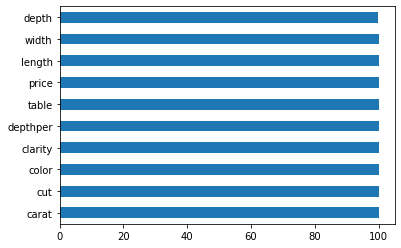

In [18]:
non_zero_per.plot(kind="barh")

In [19]:
#replacing missing depth with formula for depth
df["depth"] = np.where(df["depth"] == 0.0, 
                             (((df["length"] + df["width"])/2)*df["depthper"]),
                             df["depth"])

In [20]:
#Deleting rows where length is 0
df = df[df["length"] != 0]

In [21]:
#IQR
def iqr(column):
    return (np.quantile(column, .75)) - (np.quantile(column, .25))


def print_iqr(input, iqr_var):
    return print(f"{input} IQR is: " + str(iqr_var))


#Lower limit
def lower_limit(column, iqr_var):
    return round((np.quantile(column, .25) - 1.5*iqr_var), 2)


def print_lower_limit(input, low_lim_var):
    return print(f"{input} lower limit is: " + str(low_lim_var))


#Upper limit
def upper_limit(column, iqr_var):
    return round((np.quantile(column, .75) + 1.5*iqr_var), 2)


def print_upper_limit(input, up_lim_var):
    return print(f"{input} upper limit is: " + str(up_lim_var))


In [22]:
#lower limit outliers
def low_outliers(df, column, low_lim_var):
    return df[column < low_lim_var].shape[0]
    
    
def low_out_p(input, low_out_var):
    return print(f"The number of low {input} outliers is: " + str(low_out_var))


#upper limit outliers
def upper_outliers(df, column, up_lim_var):
    return df[column > up_lim_var].shape[0]


def up_out_p(input, up_out_var):
    return print(f"The number of high {input} outliers is: " + str(up_out_var))


#total outliers
def total_outliers(input, low_out_var, up_out_var):
    return print(f"The total number of {input} outliers is: " + (str(low_out_var+ up_out_var)))


#low outliers as a % of the entire dataset
def low_outliers_per(low_out_var, df):
    return low_out_var / df.shape[0]
#need to find a way to round this cause round("", 2) ain't working

def low_out_per_p(input, low_out_per_var):
    return print(f"The total percentage of diamonds that have low {input} outliers is: " + str(low_out_per_var * 100) + "%")


#upper outliers as a % of the entire dataset
def upper_outliers_per(up_out_var, df):
    return up_out_var / df.shape[0]


def up_out_per_p(input, up_out_per_var):
    return print(f"The total percentage of diamonds that have upper {input} outliers is: " + str(up_out_per_var * 100) + "%")


#total outliers as a % of the entrie dataset
def total_outliers_per(input, low_out_per_var, up_out_per_var):
    return print(f"The total percentage of diamonds that have {input} outliers is: " + (str((low_out_per_var + up_out_per_var)*100)) +"%")

## Exploratory Analysis and Visualization

Columns we'll analyze:

1. Price
2. Carat
3. Depthper
4. Table
5. Length
6. Width
7. Depth
8. Cut
9. Color
10. Clairty

In [23]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depthper', 'table', 'price',
       'length', 'width', 'depth'],
      dtype='object')

In [24]:
df.corr()

,carat,depthper,table,price,length,width,depth
carat,1.000000,0.028221,0.181658,0.921610,0.977765,0.953989,0.127129
depthper,0.028221,1.000000,-0.295700,-0.010670,-0.025097,-0.029141,0.003195
table,0.181658,-0.295700,1.000000,0.127165,0.196130,0.184530,0.021334
price,0.921610,-0.010670,0.127165,1.000000,0.887227,0.867872,0.111714
length,0.977765,-0.025097,0.196130,0.887227,1.000000,0.974933,0.124839
width,0.953989,-0.029141,0.184530,0.867872,0.974933,1.000000,0.121670
depth,0.127129,0.003195,0.021334,0.111714,0.124839,0.121670,1.000000


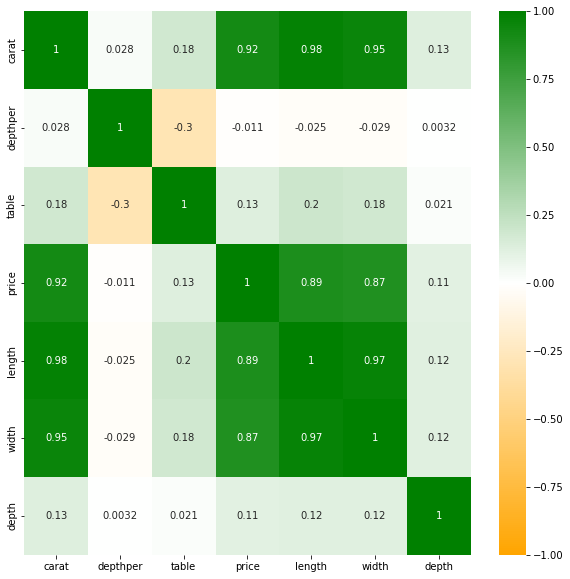

In [25]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10,10))
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['orange', 'white','green'])
ax = sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)#, fmt="0.2f", linewidths=.5)

## Price

In [26]:
df["price"].describe()

count    53932.000000
mean      3932.136079
std       3988.734835
min        326.000000
25%        949.750000
50%       2401.000000
75%       5324.000000
max      18823.000000
Name: price, dtype: float64

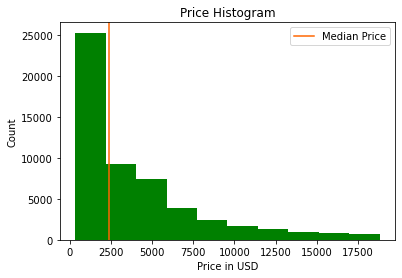

In [27]:
plt.hist(df['price'], color = 'g', bins=10)
plt.axvline((np.quantile(df['price'], .5)),color='#ff6500',label='Median Price')
plt.legend()
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.title('Price Histogram')
plt.show()

In [28]:
price_iqr = iqr(df["price"])
print_iqr("Price", price_iqr)

price_lower_limit = lower_limit(df["price"], price_iqr)
print_lower_limit("Price", price_lower_limit)

price_upper_limit = upper_limit(df["price"], price_iqr)
print_upper_limit("Price", price_upper_limit)

Price IQR is: 4374.25
Price lower limit is: -5611.62
Price upper limit is: 11885.38


In [29]:
price_low_outliers = low_outliers(df=df, column=df["price"], low_lim_var=price_lower_limit)
low_out_p(input="price", low_out_var=price_low_outliers)

price_upper_outliers = upper_outliers(df=df, column=df["price"], up_lim_var=price_upper_limit)
up_out_p(input="price", up_out_var=price_upper_outliers)

price_total_outliers = total_outliers("price", price_low_outliers, price_upper_outliers)

The number of low price outliers is: 0
The number of high price outliers is: 3537
The total number of price outliers is: 3537


In [30]:
price_low_outliers_per = low_outliers_per(low_out_var=price_low_outliers, df=df)
low_out_per_p(input="price", low_out_per_var=price_low_outliers_per)

price_upper_outliers_per= upper_outliers_per(up_out_var=price_upper_outliers, df=df)
up_out_per_p(input="price", up_out_per_var=price_upper_outliers_per)

total_outliers_per(input='price', low_out_per_var=price_low_outliers_per, up_out_per_var=price_upper_outliers_per)

The total percentage of diamonds that have low price outliers is: 0.0%
The total percentage of diamonds that have upper price outliers is: 6.558258547800934%
The total percentage of diamonds that have price outliers is: 6.558258547800934%


In [31]:
px.histogram(df, x="price")

In [32]:
#px.histogram(df, x="price", color='color')

In [33]:
#px.histogram(df, x="price", color='cut')

In [34]:
#px.histogram(df, x="price", color='clarity')

Text(0.5, 1.0, 'Price Boxplot')

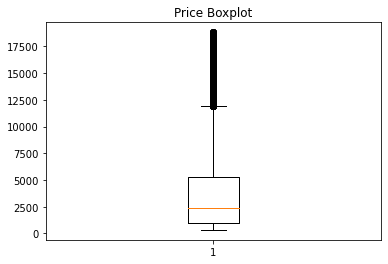

In [35]:

plt.boxplot(df['price'])
plt.title('Price Boxplot')

In [36]:
#sns.boxplot(x=df['price']).set(title='Price Boxplot')

In [37]:
#creating a df of only the outliers
#price_outlier_df = df.loc[df['price'] >= price_upper_limit]
#price_outlier_df.head()

In [38]:
#price_outlier_df.describe()

In [39]:
#price_outlier_df['price'].hist(log=False)

## Carat

In [40]:
df['carat'].describe()

count    53932.000000
mean         0.797879
std          0.473986
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

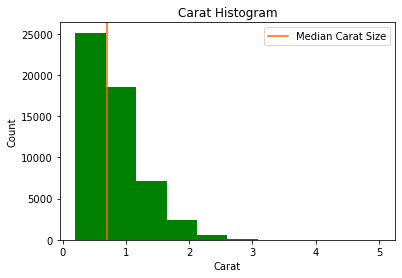

In [41]:
plt.hist(df['carat'], color = 'g', bins=10)
plt.axvline((np.quantile(df['carat'], .5)),color='#ff6500',label='Median Carat Size')
plt.legend()
plt.xlabel('Carat')
plt.ylabel('Count')
plt.title('Carat Histogram')
plt.show()

Text(0.5, 1.0, 'Carat Boxplot')

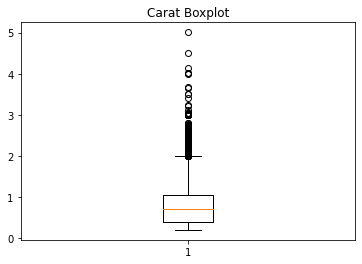

In [42]:
plt.boxplot(df['carat'])
plt.title('Carat Boxplot')

In [43]:
#sns.boxplot(x=df['carat']).set(title='Carat Boxplot')

In [44]:
px.histogram(df, x="carat")

In [45]:
carat_iqr = iqr(df["carat"])
print_iqr("Carat", carat_iqr)

carat_lower_limit = lower_limit(df["carat"], carat_iqr)
print_lower_limit("Carat", carat_lower_limit)

carat_upper_limit = upper_limit(df["carat"], carat_iqr)
print_upper_limit("Carat", carat_upper_limit)

Carat IQR is: 0.64
Carat lower limit is: -0.56
Carat upper limit is: 2.0


In [46]:
carat_low_outliers = low_outliers(df=df, column=df["carat"], low_lim_var=carat_lower_limit)
low_out_p(input="carat", low_out_var=carat_low_outliers)

carat_upper_outliers = upper_outliers(df=df, column=df["carat"], up_lim_var=carat_upper_limit)
up_out_p(input="carat", up_out_var=carat_upper_outliers)

carat_total_outliers = total_outliers("carat", carat_low_outliers, carat_upper_outliers)

The number of low carat outliers is: 0
The number of high carat outliers is: 1888
The total number of carat outliers is: 1888


In [47]:
carat_low_outliers_per = low_outliers_per(low_out_var=carat_low_outliers, df=df)
low_out_per_p(input="carat", low_out_per_var=carat_low_outliers_per)

carat_upper_outliers_per= upper_outliers_per(up_out_var=carat_upper_outliers, df=df)
up_out_per_p(input="carat", up_out_per_var=carat_upper_outliers_per)

total_outliers_per(input='carat', low_out_per_var=carat_low_outliers_per, up_out_per_var=carat_upper_outliers_per)

The total percentage of diamonds that have low carat outliers is: 0.0%
The total percentage of diamonds that have upper carat outliers is: 3.500704590966402%
The total percentage of diamonds that have carat outliers is: 3.500704590966402%


## Depthper

In [48]:
df["depthper"].describe()

count    53932.000000
mean        61.749336
std          1.432514
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depthper, dtype: float64

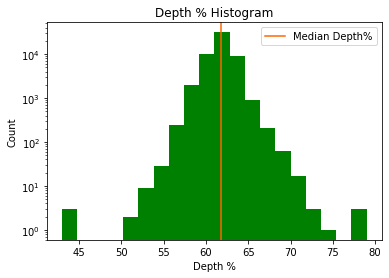

In [49]:
plt.hist(df['depthper'], color = 'g', bins=20, log=True)
plt.axvline((np.quantile(df['depthper'], .5)),color='#ff6500',label='Median Depth%')
plt.legend()
plt.xlabel('Depth %')
plt.ylabel('Count')
plt.title('Depth % Histogram')
plt.show()

Text(0.5, 1.0, 'Depth % Boxplot')

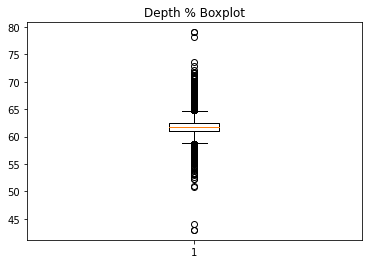

In [50]:
plt.boxplot(df['depthper'])
plt.title('Depth % Boxplot')

In [51]:
depthper_iqr = iqr(df["depthper"])
print_iqr("Depth %", depthper_iqr)

depthper_lower_limit = lower_limit(df["depthper"], depthper_iqr)
print_lower_limit("Depth %", depthper_lower_limit)

depthper_upper_limit = upper_limit(df["depthper"], depthper_iqr)
print_upper_limit("Depth %", depthper_upper_limit)

Depth % IQR is: 1.5
Depth % lower limit is: 58.75
Depth % upper limit is: 64.75


In [52]:
depthper_low_outliers = low_outliers(df=df, column=df["depthper"], low_lim_var=depthper_lower_limit)
low_out_p(input="depthper", low_out_var=depthper_low_outliers)

depthper_upper_outliers = upper_outliers(df=df, column=df["depthper"], up_lim_var=depthper_upper_limit)
up_out_p(input="depthper", up_out_var=depthper_upper_outliers)

depthper_total_outliers = total_outliers("depthper", depthper_low_outliers, depthper_upper_outliers)

The number of low depthper outliers is: 1505
The number of high depthper outliers is: 1039
The total number of depthper outliers is: 2544


In [53]:
depthper_low_outliers_per = low_outliers_per(low_out_var=depthper_low_outliers, df=df)
low_out_per_p(input="depthper", low_out_per_var=depthper_low_outliers_per)

depthper_upper_outliers_per= upper_outliers_per(up_out_var=depthper_upper_outliers, df=df)
up_out_per_p(input="depthper", up_out_per_var=depthper_upper_outliers_per)

total_outliers_per(input='depthper', low_out_per_var=depthper_low_outliers_per, up_out_per_var=depthper_upper_outliers_per)

The total percentage of diamonds that have low depthper outliers is: 2.7905510643031968%
The total percentage of diamonds that have upper depthper outliers is: 1.926500037083735%
The total percentage of diamonds that have depthper outliers is: 4.717051101386932%


## Table

In [54]:
df["table"].describe()

count    53932.000000
mean        57.457029
std          2.234064
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

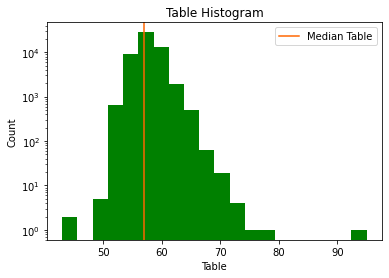

In [55]:
plt.hist(df['table'], color = 'g', bins=20, log=True)
plt.axvline((np.quantile(df['table'], .5)),color='#ff6500',label='Median Table')
plt.legend()
plt.xlabel('Table')
plt.ylabel('Count')
plt.title('Table Histogram')
plt.show()

Text(0.5, 1.0, 'Table Boxplot')

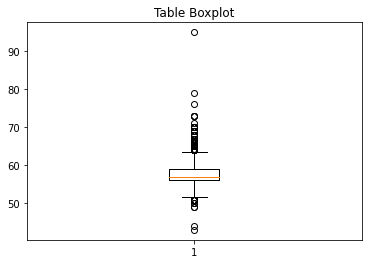

In [56]:
plt.boxplot(df['table'])
plt.title('Table Boxplot')

In [57]:
table_iqr = iqr(df["table"])
print_iqr("Table", table_iqr)

table_lower_limit = lower_limit(df["table"], table_iqr)
print_lower_limit("Table", table_lower_limit)

table_upper_limit = upper_limit(df["table"], table_iqr)
print_upper_limit("Table", table_upper_limit)

Table IQR is: 3.0
Table lower limit is: 51.5
Table upper limit is: 63.5


In [58]:
table_low_outliers = low_outliers(df=df, column=df["table"], low_lim_var=table_lower_limit)
low_out_p(input="price", low_out_var=table_low_outliers)

table_upper_outliers = upper_outliers(df=df, column=df["table"], up_lim_var=table_upper_limit)
up_out_p(input="price", up_out_var=table_upper_outliers)

table_total_outliers = total_outliers("table", table_low_outliers, table_upper_outliers)

The number of low price outliers is: 16
The number of high price outliers is: 588
The total number of table outliers is: 604


In [59]:
table_low_outliers_per = low_outliers_per(low_out_var=table_low_outliers, df=df)
low_out_per_p(input="table", low_out_per_var=table_low_outliers_per)

table_upper_outliers_per= upper_outliers_per(up_out_var=table_upper_outliers, df=df)
up_out_per_p(input="table", up_out_per_var=table_upper_outliers_per)

total_outliers_per(input="table", low_out_per_var=table_low_outliers_per, up_out_per_var=table_upper_outliers_per)

The total percentage of diamonds that have low table outliers is: 0.029666988059037308%
The total percentage of diamonds that have upper table outliers is: 1.0902618111696212%
The total percentage of diamonds that have table outliers is: 1.1199287992286584%


## Length

In [60]:
df["length"].describe()

count    53932.000000
mean         5.732007
std          1.119670
min          3.730000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: length, dtype: float64

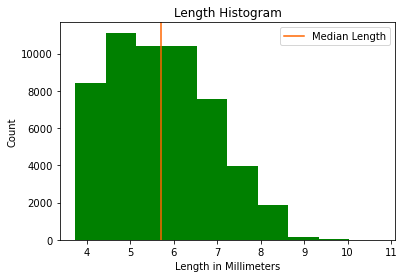

In [61]:
plt.hist(df['length'], color = 'g', bins=10)
plt.axvline((np.quantile(df['length'], .5)),color='#ff6500',label='Median Length')
plt.legend()
plt.xlabel('Length in Millimeters')
plt.ylabel('Count')
plt.title('Length Histogram')
plt.show()

Text(0.5, 1.0, 'Length Boxplot')

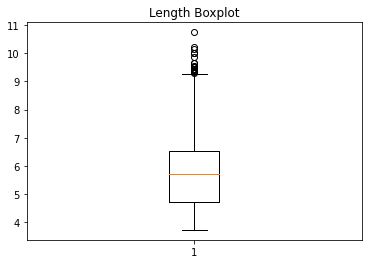

In [62]:
plt.boxplot(df['length'])
plt.title('Length Boxplot')

In [63]:
length_iqr = iqr(df["length"])
print_iqr("Price", length_iqr)

length_lower_limit = lower_limit(df["length"], length_iqr)
print_lower_limit("length", length_lower_limit)

length_upper_limit = upper_limit(df["length"], length_iqr)
print_upper_limit("Lenght", length_upper_limit)

Price IQR is: 1.83
length lower limit is: 1.96
Lenght upper limit is: 9.28


In [64]:
length_low_outliers = low_outliers(df=df, column=df["length"], low_lim_var=length_lower_limit)
low_out_p(input="length", low_out_var=length_low_outliers)

length_upper_outliers = upper_outliers(df=df, column=df["length"], up_lim_var=length_upper_limit)
up_out_p(input="length", up_out_var=length_upper_outliers)

length_total_outliers = total_outliers("length", length_low_outliers, length_upper_outliers)

The number of low length outliers is: 0
The number of high length outliers is: 24
The total number of length outliers is: 24


In [65]:
length_low_outliers_per = low_outliers_per(low_out_var=length_low_outliers, df=df)
low_out_per_p(input="length", low_out_per_var=length_low_outliers_per)

length_upper_outliers_per= upper_outliers_per(up_out_var=length_upper_outliers, df=df)
up_out_per_p(input="length", up_out_per_var=length_upper_outliers_per)

total_outliers_per(input="length", low_out_per_var=length_low_outliers_per, up_out_per_var=length_upper_outliers_per)

The total percentage of diamonds that have low length outliers is: 0.0%
The total percentage of diamonds that have upper length outliers is: 0.04450048208855596%
The total percentage of diamonds that have length outliers is: 0.04450048208855596%


## Width

In [66]:
df["width"].describe()

count    53932.000000
mean         5.735254
std          1.140343
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: width, dtype: float64

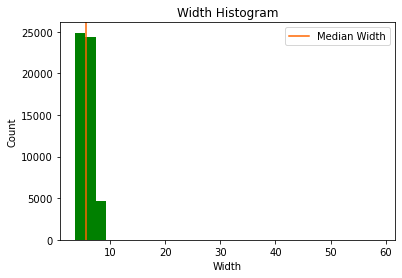

In [67]:
plt.hist(df['width'], color = 'g', bins=30)
plt.axvline((np.quantile(df['width'], .5)),color='#ff6500',label='Median Width')
plt.legend()
plt.xlabel('Width')
plt.ylabel('Count')
plt.title('Width Histogram')
plt.show()

Text(0.5, 1.0, 'Width Boxplot')

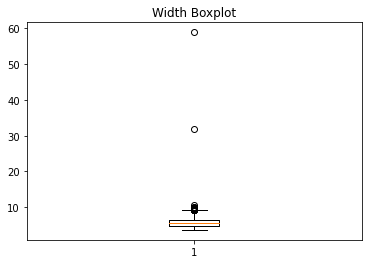

In [68]:
plt.boxplot(df['width'])
plt.title('Width Boxplot')

In [69]:
width_iqr = iqr(df["width"])
print_iqr("Width", width_iqr)

width_lower_limit = lower_limit(df["width"], width_iqr)
print_lower_limit("Width", width_lower_limit)

width_upper_limit = upper_limit(df["width"], width_iqr)
print_upper_limit("Width", width_upper_limit)

Width IQR is: 1.8200000000000003
Width lower limit is: 1.99
Width upper limit is: 9.27


In [70]:
width_low_outliers = low_outliers(df=df, column=df["width"], low_lim_var=width_lower_limit)
low_out_p(input="width", low_out_var=width_low_outliers)

width_upper_outliers = upper_outliers(df=df, column=df["width"], up_lim_var=width_upper_limit)
up_out_p(input="width", up_out_var=width_upper_outliers)

width_total_outliers = total_outliers("width", width_low_outliers, width_upper_outliers)

The number of low width outliers is: 0
The number of high width outliers is: 22
The total number of width outliers is: 22


In [71]:
width_low_outliers_per = low_outliers_per(low_out_var=width_low_outliers, df=df)
low_out_per_p(input="width", low_out_per_var=width_low_outliers_per)

width_upper_outliers_per= upper_outliers_per(up_out_var=width_upper_outliers, df=df)
up_out_per_p(input="width", up_out_per_var=width_upper_outliers_per)

total_outliers_per(input="width", low_out_per_var=width_low_outliers_per, up_out_per_var=width_upper_outliers_per)

The total percentage of diamonds that have low width outliers is: 0.0%
The total percentage of diamonds that have upper width outliers is: 0.040792108581176295%
The total percentage of diamonds that have width outliers is: 0.040792108581176295%


In [72]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_order = ['J','I','H', 'G', 'F', 'E', 'D']

<AxesSubplot:xlabel='price', ylabel='carat'>

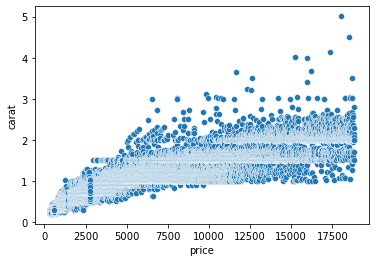

In [73]:
sns.scatterplot(x="price", y="carat", data=df)

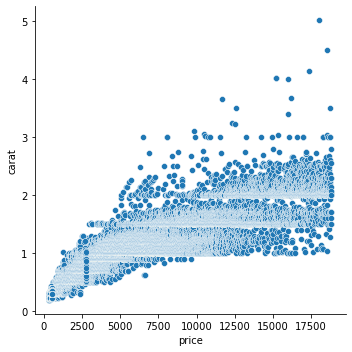

In [74]:
sns.relplot(x="price", y="carat", data=df, kind="scatter")

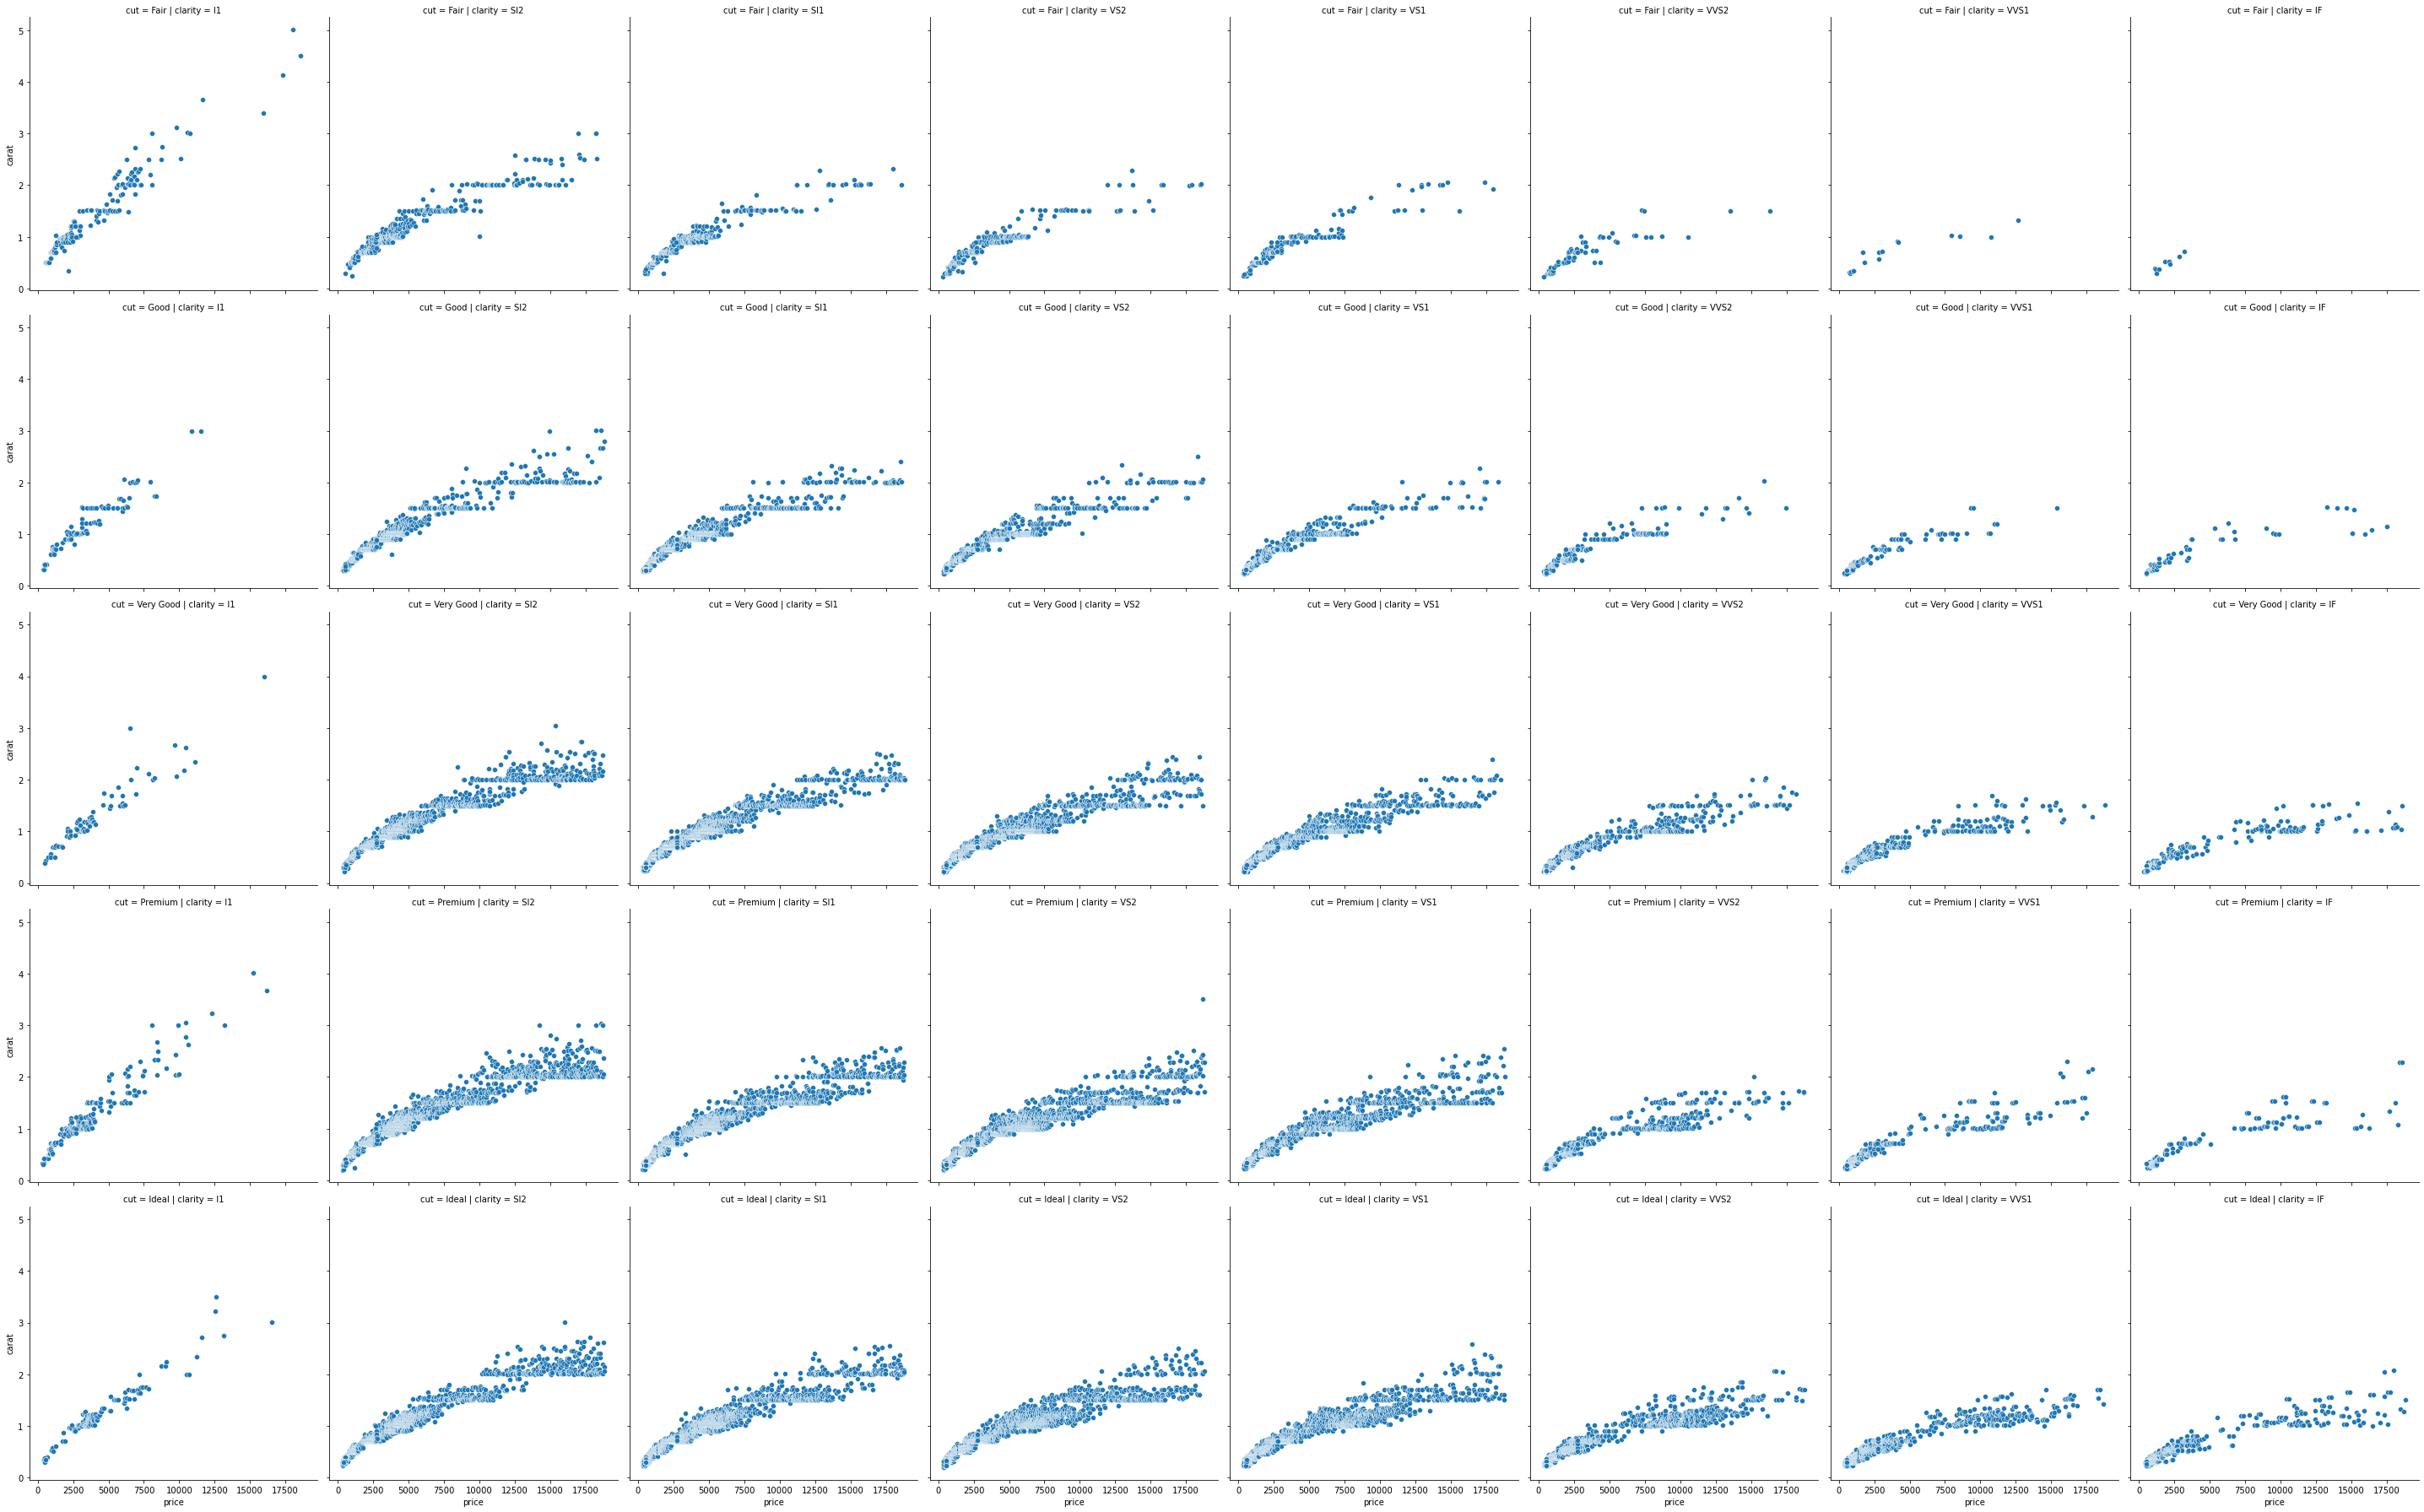

In [75]:
sns.relplot(x="price", y="carat", data=df, kind="scatter", row="cut", row_order=cut_order, col="clarity", col_order=clarity_order)

In [76]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_order = ['J','I','H', 'G', 'F', 'E', 'D']

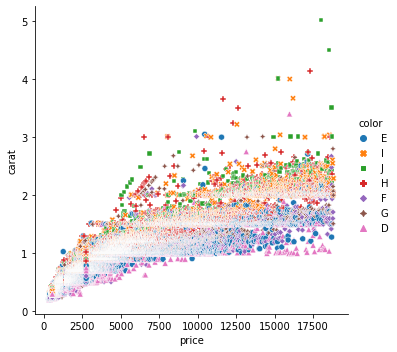

In [77]:
sns.relplot(x="price", y="carat", data=df, kind="scatter", hue="color", style="color")

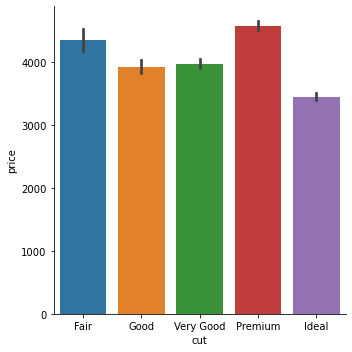

In [78]:
sns.catplot(data=df, x="cut", y="price", kind="bar", order=cut_order)

<AxesSubplot:xlabel='cut', ylabel='price'>

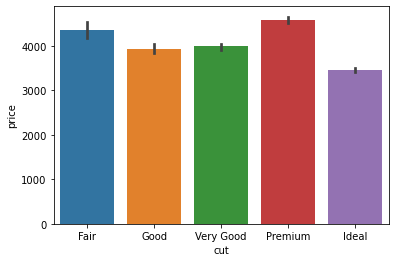

In [79]:
sns.barplot(data=df, x="cut", y="price", order=cut_order)

<AxesSubplot:xlabel='cut', ylabel='price'>

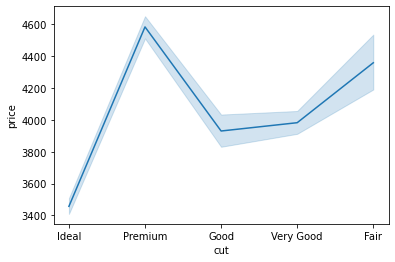

In [80]:
sns.lineplot(x="cut", y="price", data=df)

<AxesSubplot:xlabel='cut', ylabel='price'>

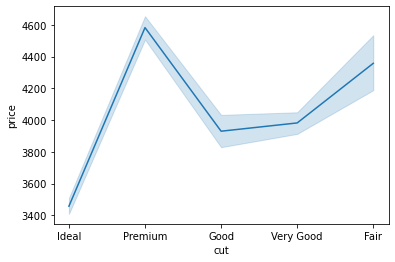

In [81]:
sns.lineplot(x = 'cut', y = 'price', data = df)


<AxesSubplot:xlabel='cut', ylabel='price'>

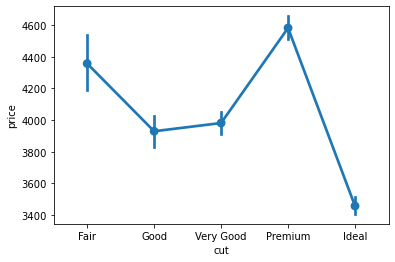

In [82]:
sns.pointplot(data=df, x="cut", y="price", kind="point", order=cut_order)

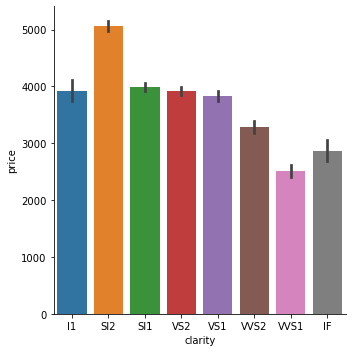

In [83]:
sns.catplot(data=df, x="clarity", y="price", kind="bar", order=clarity_order)

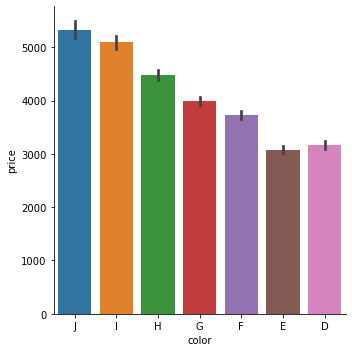

In [84]:
sns.catplot(data=df, x="color", y="price", kind="bar", order=color_order)

## Ask and Answer Question

1. Are there a lot of outliers? How do the stats look if we disregard outliers?
2. Give stats regarding the carat grouping. Like what % are around 1/3 ct, 1/2 ct, 1 ct, 2 ct?
3. 
4. 
5. 

## Summary and Conclusion


Insights:
- The number of carats are grouped around certain weights (1/3 of a carat, 1 carat, 2 carats, etc)
- 
- 
- 